In [ ]:
!pip install -q git+https://github.com/huggingface/transformers.git

In [ ]:
!pip install -q monai

In [ ]:
!pip install -q datasets

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
import os
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
image_path = '/home/interns/Desktop/sandipan/OPMD_FULL_SIZE/Test_Train/Train/Images'
mask_path = '/home/interns/Desktop/sandipan/OPMD_FULL_SIZE/Test_Train/Train/Masks'

images = sorted(os.listdir(image_path))
masks = sorted(os.listdir(mask_path))

image_true = [cv.cvtColor(cv.imread(os.path.join(image_path, image)), cv.COLOR_BGR2RGB) for image in images]
mask_true = [cv.imread(os.path.join(mask_path, mask), cv.IMREAD_GRAYSCALE) for mask in masks]

image_true = np.array([((cv.resize(image, (256,256),
                                   ))) 
                       for image in image_true])
mask_true = np.array([((cv.resize(mask, (256,256), 
                                  )/255).astype(np.uint8))
                      for mask in mask_true])

print(image_true.shape)
print(mask_true.shape)

In [ ]:

# import cv2 as cv
# import numpy as np
# import os
# import matplotlib.pyplot as plt

# image_folder = '/home/interns/Desktop/sandipan/OPMD_refined_dataset/crop_six class_images'
# label_folder = '/home/interns/Desktop/sandipan/OPMD_refined_dataset/crop_six class_labels'

# labels = os.listdir(label_folder)
# images = os.listdir(image_folder)

# labels_sorted = sorted(labels)
# images_sorted = sorted(images)

# # print(labels_sorted)
# # print(images_sorted)
# test_label = '00_1ca83cc9-20221210_181957.txt'
# test_image = '00_1ca83cc9-20221210_181957.jpg'
# j = 1

# target_image_folder = "/home/interns/Desktop/sandipan/OPMD_FULL_Split/Train/Images"
# target_mask_folder = "/home/interns/Desktop/sandipan/OPMD_FULL_Split/Train/Masks"


# def resize_coordinate(img_coordinates, x_shape, y_shape):
#     return (img_coordinates * np.array([y_shape, x_shape])).astype(int)


# def is_empty_mask(image):
#     return np.max(image) < 1



# for label, image in zip(labels_sorted, images_sorted):
#     j+=1
#     # print("image number", j)
#     # break # to avoid the code from running again by mistake
#     label_path = os.path.join(label_folder, label)
#     image_path = os.path.join(image_folder, image)

#     image_file = cv.imread(image_path)

#     with open(label_path, 'r') as labelt:
#         content = labelt.read()

#     splitted_content = content.split('\n')

#     element = np.array([list(map(float, line.split())) for line in splitted_content], dtype=object)

#     mask = np.zeros_like(image_file)
#     # print(len(element))
#     # print(element)
#     # print("xxxxxx_______xxxxxx")
#     # print(element[0])
#     # print("xxxxxx__1____xxxxxx")
#     # print(element[1][1:])
#     # print("xxxxxx______xxxxxx")
#     # print(element[2])
#     # break
#     for i in range(len(element) - 1):
#         # print(f"xxxxxx___{i}____xxxxxx")
#         # print(element[i])
        
#         element_x = np.array((element[i][1:])).reshape(-1, 2)
#         # print("xxxxxx_______xxxxxx")
#         # print(element)
#         # print(element.shape)
#         # print("xxxxxx_______xxxxxx")
#         coordinates_resized = resize_coordinate(element_x, x_shape=image_file.shape[0], y_shape=image_file.shape[1])
#         # print(coordinates_resized)
#         # print(coordinates_resized.shape)
#         cv.fillPoly(mask, [coordinates_resized], (255, 255, 255))
    
    
#     # x = cv.cvtColor(x, cv.COLOR_BGR2RGB)

#     img = cv.resize(image_file, (256, 256), 
#                     interpolation=cv.INTER_CUBIC
#                     )

#     mask = cv.resize(mask, (256, 256), 
#                             interpolation=cv.INTER_CUBIC
#                             )
    
#     # x = cv.addWeighted(img, 0.5, mask, 0.5, 0)
    
#     if is_empty_mask(mask):
#         continue
    
#     cv.imwrite(os.path.join(target_image_folder, image), img)
#     cv.imwrite(os.path.join(target_mask_folder, image), mask)

    
# #     cv.imshow('img', x)
# #     # cv.imshow('mask', mask)
# #     cv.waitKey(0)
# #     cv.destroyAllWindows()
# #     if j==15:
# #      break
    

# # plt.figure(figsize=(15, 5))
# # for i, image in enumerate(weighted_images, 1):
# #     plt.subplot(1, len(weighted_images), i)
# #     plt.imshow(image)
# #     plt.axis('off')
# # plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Example index to check
index = 5000


# You can change this index to other values to check different pairs

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image_true[index])
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Corresponding Mask')
plt.imshow(mask_true[index], cmap='gray')  # Display the mask in grayscale
plt.axis('off')

plt.show()


In [ ]:









type(image_true[0])

In [ ]:
# Removing empty mask
valid_indices = [i for i, mask in enumerate(mask_true) if mask.max()!=0]
image_true = image_true[valid_indices]
mask_true = mask_true[valid_indices]

In [ ]:
image_true.shape

In [ ]:
from datasets import Dataset
from PIL import Image

dataset_dict = {
    'image': [Image.fromarray(img) for img in image_true],
    'mask': [Image.fromarray(img) for img in mask_true]
}

dataset = Dataset.from_dict(dataset_dict)

In [ ]:
dataset

In [ ]:
img_num = np.random.randint(0, image_true.shape[0]-1)
example_image = dataset[img_num]["image"]
example_mask = dataset[img_num]["mask"]

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot the first image on the left
axes[0].imshow(np.array(example_image), cmap='gray')  # Assuming the first image is grayscale
axes[0].set_title("Image")

# Plot the second image on the right
axes[1].imshow(example_mask, cmap='gray')  # Assuming the second image is grayscale
axes[1].set_title("Mask")

# Hide axis ticks and labels
for ax in axes:
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xticklabels([])
    ax.set_yticklabels([])

# Display the images side by side
plt.show()

In [ ]:
#Get bounding boxes from mask.
def get_bounding_box(ground_truth_map):
  # get bounding box from mask
  y_indices, x_indices = np.where(ground_truth_map > 0)
  x_min, x_max = np.min(x_indices), np.max(x_indices)
  y_min, y_max = np.min(y_indices), np.max(y_indices)
  # add perturbation to bounding box coordinates
  H, W = ground_truth_map.shape
  x_min = max(0, x_min - np.random.randint(0, 20))
  x_max = min(W, x_max + np.random.randint(0, 20))
  y_min = max(0, y_min - np.random.randint(0, 20))
  y_max = min(H, y_max + np.random.randint(0, 20))
  bbox = [x_min, y_min, x_max, y_max]
  # bbox = [0, 0, 256, 256]

  return bbox

In [ ]:
from torch.utils.data import Dataset

class SAMDataset(Dataset):
  """
  This class is used to create a dataset that serves input images and masks.
  It takes a dataset and a processor as input and overrides the __len__ and __getitem__ methods of the Dataset class.
  """
  def __init__(self, dataset, processor):
    self.dataset = dataset
    self.processor = processor

  def __len__(self):
    return len(self.dataset)

  def __getitem__(self, idx):
    item = self.dataset[idx]
    image = item["image"]
    ground_truth_mask = np.array(item["mask"])

    # get bounding box prompt
    # prompt = get_bounding_box(ground_truth_mask)

    # prepare image and prompt for the model
    # input_boxes=[[prompt]]
    inputs = self.processor(image, return_tensors="pt")

    # remove batch dimension which the processor adds by default
    inputs = {k:v.squeeze(0) for k,v in inputs.items()}

    # add ground truth segmentation
    inputs["ground_truth_mask"] = ground_truth_mask

    return inputs

In [ ]:
# train_new_leukoplakia_ds = NewLeukoplakiaDataset(new_train_image_paths,new_train_segmentations, transform=train_transforms)
# val_new_leukoplakia_ds = NewLeukoplakiaDataset(new_val_image_paths,new_val_segmentations, transform=val_transforms)

In [ ]:
import torch

In [ ]:
# Initialize the processor
from transformers import SamProcessor
processor = SamProcessor.from_pretrained("facebook/sam-vit-base")

In [ ]:
# Create an instance of the SAMDataset
train_dataset = SAMDataset(dataset=dataset, processor=processor)

In [ ]:
# train_set = torch.utils.data.ConcatDataset([train_dataset, train_new_leukoplakia_ds])

In [ ]:
example = train_dataset[0]
for k,v in example.items():
  print(k,v.shape)

In [ ]:
from torch.utils.data import DataLoader
train_dataloader = DataLoader(train_dataset, batch_size=2, shuffle=True, drop_last=False)

In [ ]:
batch = next(iter(train_dataloader))
for k,v in batch.items():
  print(k,v.shape)

In [ ]:
batch["ground_truth_mask"].shape

In [ ]:
# Cell for SLIC Preprocessing Function Definition
from skimage.segmentation import slic
from skimage.color import rgb2lab
import numpy as np

def preprocess_with_slic(image, n_segments=100, compactness=10.0):
    """
    Apply SLIC (Simple Linear Iterative Clustering) to segment an image into superpixels.
    
    Parameters:
    image (numpy.ndarray): The input image in RGB format.
    n_segments (int): The number of segments for clustering.
    compactness (float): Compactness factor for clustering (higher values mean more spatial proximity).
    
    Returns:
    numpy.ndarray: The image represented with average superpixel colors.
    """
    # Convert the image to Lab color space to aid the SLIC algorithm
    lab_image = rgb2lab(image)
    # Apply SLIC and create segments
    segments = slic(lab_image, n_segments=n_segments, compactness=compactness, start_label=0)
    # Create a new image to store the mean color of each superpixel
    superpixel_image = np.zeros_like(image)
    for segment_val in np.unique(segments):
        mask = segments == segment_val
        superpixel_image[mask] = np.mean(image[mask], axis=0)
    return superpixel_image

# Assuming 'train_images' is your list/array of training images
preprocessed_train_images = [preprocess_with_slic(img) for img in train_images]

# Cell for Training the Model
# Here, replace 'model.train' with your actual training function and 'train_labels' with your labels.
# This is pseudocode for the training process.
model.train(preprocessed_train_images, train_labels)  # Assuming 'model.train' is how you train your model


In [ ]:
# Load the model
from transformers import SamModel
model = SamModel.from_pretrained("facebook/sam-vit-base")

# make sure we only compute gradients for mask decoder
for name, param in model.named_parameters():
  if name.startswith("vision_encoder") or name.startswith("prompt_encoder"):
    param.requires_grad_(False)

In [ ]:
from torch.optim import Adam
import monai
# Initialize the optimizer and the loss function
optimizer = Adam(model.mask_decoder.parameters(), lr=1e-5, weight_decay=0)
#Try DiceFocalLoss, FocalLoss, DiceCELoss
seg_loss = monai.losses.DiceCELoss(sigmoid=True, squared_pred=True, reduction='mean')

In [ ]:
from tqdm import tqdm
from statistics import mean
import torch
from torch.nn.functional import threshold, normalize

#Training loop
num_epochs = 50

device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)

save_model = 0

model.train()
for epoch in range(num_epochs):
    epoch_losses = []
    save_model+=1
    for batch in tqdm(train_dataloader):
      # forward pass
      outputs = model(pixel_values=batch["pixel_values"].to(device),
                      # input_boxes=batch["input_boxes"].to(device),
                      multimask_output=False)

      # compute loss
      predicted_masks = outputs.pred_masks.squeeze(1)
      ground_truth_masks = batch["ground_truth_mask"].float().to(device)
      loss = seg_loss(predicted_masks, ground_truth_masks.unsqueeze(1))

      # backward pass (compute gradients of parameters w.r.t. loss)
      optimizer.zero_grad()
      loss.backward()

      # optimize
      optimizer.step()
      epoch_losses.append(loss.item())

    if save_model%10 == 0:
      torch.save(model.state_dict(), "/home/interns/Desktop/sandipan/MED_SAM_All_full.pth")
    print(f'EPOCH: {epoch}')
    print(f'Mean loss: {mean(epoch_losses)}')

In [ ]:
torch.save(model.state_dict(), "/home/interns/Desktop/sandipan/MED_SAM_All_full.pth")

In [ ]:
from transformers import SamModel, SamConfig, SamProcessor
import torch

In [ ]:
model_config = SamConfig.from_pretrained("facebook/sam-vit-base")
processor = SamProcessor.from_pretrained("facebook/sam-vit-base")
my_model = SamModel(config=model_config)
my_model.load_state_dict(torch.load("/home/interns/Desktop/sandipan/MED_SAM1_full.pth"))

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
my_model.to(device)

In [ ]:
import numpy as np
import torch
import random
import matplotlib.pyplot as plt

idx = random.randint(0, image_true.shape[0] - 1)

test_image = dataset[idx]["image"]
ground_truth_mask = np.array(dataset[idx]["mask"])
prompt = get_bounding_box(ground_truth_mask)

# prepare image + box prompt for the model
inputs = processor(test_image, input_boxes=[[prompt]], return_tensors="pt")

# Move the input tensor to the GPU if it's not already there
inputs = {k: v.to(device) for k, v in inputs.items()}

my_model.eval()

# forward pass
with torch.no_grad():
    outputs = my_model(**inputs, multimask_output=False)

# apply sigmoid
medsam_seg_prob = torch.sigmoid(outputs.pred_masks.squeeze(1))
# convert soft mask to hard mask
medsam_seg_prob = medsam_seg_prob.cpu().numpy().squeeze()
medsam_seg = (medsam_seg_prob > 0.5).astype(np.uint8)


fig, axes = plt.subplots(1, 4, figsize=(15, 5))

# Plot the first image on the left
axes[0].imshow(np.array(test_image), cmap='gray')  # Assuming the first image is grayscale
axes[0].set_title("Image")

# Plot the second image on the right
axes[1].imshow(medsam_seg, cmap='gray')  # Assuming the second image is grayscale
axes[1].set_title("Mask")

# Plot the second image on the right
axes[2].imshow(medsam_seg_prob)  # Assuming the second image is grayscale
axes[2].set_title("Probability Map")

# Plot the second image on the right
axes[3].imshow(ground_truth_mask)  # Assuming the second image is grayscale
axes[3].set_title("Ground Truth Mask")

# Hide axis ticks and labels
for ax in axes:
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xticklabels([])
    ax.set_yticklabels([])

# Display the images side by side
plt.show()



In [ ]:
# Model Evaluation


test_image_path = '/home/interns/Desktop/sandipan/OPMD_FULL_Split/Test/Images'
test_mask_path = '/home/interns/Desktop/sandipan/OPMD_FULL_Split/Test/Masks'

images = sorted(os.listdir(test_image_path))
masks = sorted(os.listdir(test_mask_path))

image_test = [cv.cvtColor(cv.imread(os.path.join(test_image_path, image)), cv.COLOR_BGR2RGB) for image in images]
mask_test = [cv.cvtColor(cv.imread(os.path.join(test_mask_path, mask)), cv.COLOR_BGR2GRAY) for mask in masks]

image_test = np.array([cv.resize(image, (256,256), interpolation = cv.INTER_LANCZOS4) for image in image_test])
mask_test = np.array([(cv.resize(mask, (256,256), interpolation = cv.INTER_LANCZOS4)).astype(np.uint8) for mask in mask_test])



In [ ]:

random_number = random.randint(0, image_test.shape[0] - 1)

test_image = Image.fromarray(image_test[random_number])
test_mask = (mask_test[random_number]/255).astype(np.uint8)

inputs = processor(test_image, return_tensors="pt")

# Move the input tensor to the GPU if it's not already there
inputs = {k: v.to(device) for k, v in inputs.items()}
my_model.eval()

#forward pass
with torch.no_grad():
    outputs = my_model(**inputs, multimask_output=False)

#apply sigmoid
single_patch_prob = torch.sigmoid(outputs.pred_masks.squeeze(1))
single_patch_prob = single_patch_prob.cpu().numpy().squeeze()
single_patch_prediction = (single_patch_prob > 0.1).astype(np.uint8)



fig, axes = plt.subplots(1, 4, figsize=(15, 5))

# Plot the first image on the left
axes[0].imshow(np.array(test_image))  # Assuming the first image is grayscale
axes[0].set_title("Image")

# Plot the second image on the right
axes[1].imshow(single_patch_prob)  # Assuming the second image is grayscale
axes[1].set_title("Probability Map")

# Plot the second image on the right
axes[2].imshow(single_patch_prediction, cmap='gray')  # Assuming the second image is grayscale
axes[2].set_title("Prediction")

# Plot the second image on the right
axes[3].imshow(test_mask)  # Assuming the second image is grayscale
axes[3].set_title("Ground Truth Mask")
# print(accuracy_score(test_mask, single_patch_prediction))

# Hide axis ticks and labels
for ax in axes:
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xticklabels([])
    ax.set_yticklabels([])

# Display the images side by side
plt.show()

In [ ]:
from evaluation_metrics import percent_overlap, IOU, dice_coefficient

In [ ]:
def is_binary_mask(mask):
    # Check if all elements are either 0 or 1
    if np.all(np.logical_or(mask == 0, mask == 1)):
        # Check if the data type is integer or boolean
        if np.issubdtype(mask.dtype, np.integer) or mask.dtype == np.bool_:
            # Check if unique values are only 0 and 1
            unique_values = np.unique(mask)
            if len(unique_values) == 2 and 0 in unique_values and 1 in unique_values:
                return True
    return False

def make_binary_mask(mask):
  _, binary_mask = cv.threshold(mask, 0, 1, cv.THRESH_BINARY)
  return binary_mask

In [ ]:
from transformers import SamModel, SamConfig, SamProcessor
import torch
model_config = SamConfig.from_pretrained("facebook/sam-vit-base")
model_processor = SamProcessor.from_pretrained("facebook/sam-vit-base")
MedSAM = SamModel(config=model_config)
MedSAM.load_state_dict(torch.load("/home/interns/Desktop/sandipan/MED_SAM1.pth"))

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
MedSAM.to(device)

In [ ]:
percent_overlap_score = []
IOU_score = []
dice_score = []
c = 0

for i in range(len(image_test)):

    test_image = image_test[i]
    test_mask = (mask_test[i]/255).astype(np.uint8)
    print(test_image.shape)
    
    inputs = model_processor(test_image, retrun_tensor = "pt")
    # print(inputs.items())

    inputs = {k: v.to(device) for k, v in inputs.items()}
    MedSAM.eval()

    with torch.no_grad():
        outputs = MedSAM(**inputs, multimask_output =False)

    prob = torch.sigmoid(outputs.pred_mask.squeeze(1))
    prob = prob.cpu().numpy().squeeze()
    mask = (prob > 0.2).astype(np.uint8)

    mask_true = make_binary_mask(test_mask)
    print(is_binary_mask(mask_true))
    print(is_binary_mask(mask))

    break

    

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def calculate_metrics(y_true, y_pred):
    # Flatten the arrays to compute global metrics
    y_true_flat = y_true.flatten()
    y_pred_flat = y_pred.flatten()
    
    accuracy = accuracy_score(y_true_flat, y_pred_flat)
    precision = precision_score(y_true_flat, y_pred_flat, zero_division=0)
    recall = recall_score(y_true_flat, y_pred_flat, zero_division=0)
    f1 = f1_score(y_true_flat, y_pred_flat, zero_division=0)
    # iou = calculate_iou(y_true, y_pred)
    
    return accuracy, precision, recall, f1

# Initialize lists to hold the metric values for each test sample
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
iou_scores = []

# Assuming `test_mask` is the ground truth and `single_patch_prediction` is the prediction from the model
# Loop over your entire test dataset to fill the lists with metrics
# Here's an example for a single prediction for demonstration purposes
metrics = calculate_metrics(test_mask, single_patch_prediction)

# Unpack metrics
accuracy, precision, recall, f1= metrics

# Append to lists
accuracy_scores.append(accuracy)
precision_scores.append(precision)
recall_scores.append(recall)
f1_scores.append(f1)
# iou_scores.append(iou)

# Calculate average metrics across all test samples
average_accuracy = np.mean(accuracy_scores)
average_precision = np.mean(precision_scores)
average_recall = np.mean(recall_scores)
average_f1 = np.mean(f1_scores)
# average_iou = np.mean(iou_scores)

# Print the averages
print(f"Average Accuracy: {average_accuracy}")
print(f"Average Precision: {average_precision}")
print(f"Average Recall: {average_recall}")
print(f"Average F1 Score: {average_f1}")
# print(f"Average IOU: {average_iou}")



In [ ]:
def calculate_extended_metrics(y_true, y_pred):
    # Flatten the arrays for computation
    y_true_flat = y_true.flatten()
    y_pred_flat = y_pred.flatten()

    accuracy = accuracy_score(y_true_flat, y_pred_flat)
    precision = precision_score(y_true_flat, y_pred_flat, zero_division=0)
    recall = recall_score(y_true_flat, y_pred_flat, zero_division=0)
    f1 = f1_score(y_true_flat, y_pred_flat, zero_division=0)
    #iou = calculate_iou(y_true, y_pred)
    
    # Dice coefficient, also known as F1 score for segmentation
    dice = 2 * (precision * recall) / (precision + recall + 1e-6)
    
    # True Positive Rate (Sensitivity) and Specificity calculations
    true_positive = np.logical_and(y_true, y_pred).sum()
    false_positive = np.logical_and(np.logical_not(y_true), y_pred).sum()
    true_negative = np.logical_and(np.logical_not(y_true), np.logical_not(y_pred)).sum()
    false_negative = np.logical_and(y_true, np.logical_not(y_pred)).sum()
    
    sensitivity = true_positive / (true_positive + false_negative + 1e-6)
    specificity = true_negative / (true_negative + false_positive + 1e-6)

    return accuracy, precision, recall, f1, dice, sensitivity, specificity

# Example usage for a single prediction
metrics = calculate_extended_metrics(test_mask, single_patch_prediction)

# Unpack metrics
accuracy, precision, recall, f1,  dice, sensitivity, specificity = metrics

# Printing the metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
#print(f"IOU: {iou}")
print(f"Dice Coefficient: {dice}")
print(f"Sensitivity (True Positive Rate): {sensitivity}")
print(f"Specificity (True Negative Rate): {specificity}")


In [ ]:
def calculate_mean_iou(y_trues, y_preds):
    iou_scores = []
    for y_true, y_pred in zip(y_trues, y_preds):
        iou_score = calculate_iou(y_true, y_pred)
        iou_scores.append(iou_score)
    mean_iou = np.mean(iou_scores)
    return mean_iou

# Assuming `test_masks` is an array of your ground truth masks and `predictions` is an array of your predicted masks
# You would replace this with the actual way you're generating predictions
predictions = [single_patch_prediction for _ in range(len(test_mask))]  # Example, replace with actual prediction logic

mean_iou = calculate_mean_iou(test_mask, predictions)
print(f"Mean IoU: {mean_iou}")


In [ ]:
import matplotlib.pyplot as plt

def visualize_predictions(test_images, ground_truths, predictions, num_samples=3):
    fig, axs = plt.subplots(num_samples, 3, figsize=(15, 5*num_samples))
    for i in range(num_samples):
        axs[i, 0].imshow(test_images[i])
        axs[i, 0].title.set_text('Test Image')
        axs[i, 1].imshow(ground_truths[i], cmap='gray')
        axs[i, 1].title.set_text('Ground Truth Mask')
        axs[i, 2].imshow(predictions[i], cmap='gray')
        axs[i, 2].title.set_text('Predicted Mask')
        for ax in axs[i]:
            ax.axis('off')
    plt.tight_layout()
    plt.show()

# Randomly select a few samples to visualize
indices = np.random.choice(range(len(test_mask)), size=3, replace=False)
sample_images = [test_image[i] for i in indices]  # Assuming `test_images` is your list of test images
sample_gt_masks = [test_mask[i] for i in indices]
sample_predictions = [predictions[i] for i in indices]

visualize_predictions(sample_images, sample_gt_masks, sample_predictions)

In [ ]:
import numpy as np

def calculate_iou(y_true, y_pred):
    """
    Calculate the Intersection over Union (IoU) score.
    
    :param y_true: Ground truth mask.
    :param y_pred: Predicted mask.
    :return: IoU score.
    """
    # Ensure boolean logic; cast to bool if not already
    y_true = y_true.astype(bool)
    y_pred = y_pred.astype(bool)
    
    intersection = np.logical_and(y_true, y_pred)
    union = np.logical_or(y_true, y_pred)
    iou_score = np.sum(intersection) / np.sum(union)
    return iou_score


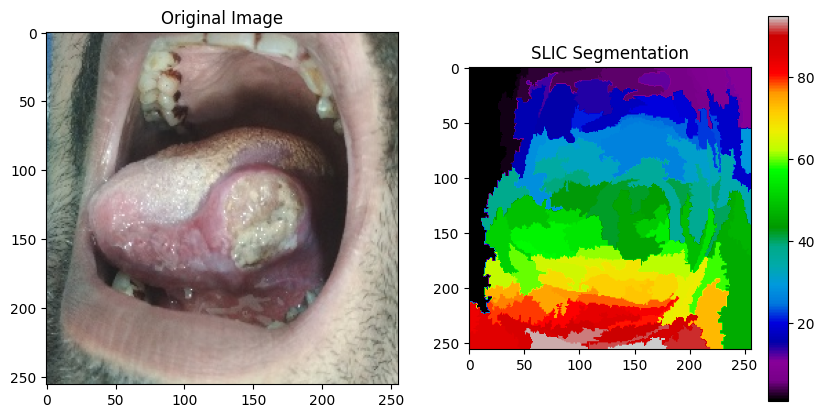

NameError: name 'Sequential' is not defined

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.segmentation import slic
from skimage.io import imread, imshow
from skimage import img_as_float

def load_and_preprocess_image(path):
    # Load the image
    image = imread(path)
    # Convert to float and normalize if needed (ensure the range is [0, 1])
    image = img_as_float(image)
    return image

def apply_slic_and_create_mask(image, num_segments):
    # Apply SLIC
    segments = slic(image, n_segments=200, compactness=1, enforce_connectivity=True)
    # Display the segmentation
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.title('Original Image')
    plt.imshow(image)
    plt.subplot(1, 2, 2)
    plt.title('SLIC Segmentation')
    plt.imshow(segments, cmap='nipy_spectral')
    plt.colorbar()
    plt.show()
    
    # Create a mask for segments (simple example: just one object class)
    mask = np.zeros(image.shape[:2])
    mask[segments == 0] = 1  # Example: Segment 0 is the object
    return mask

# Continue with your previous logic for model training and usage

    
    # Create a mask for segments (simple example: just one object class)
    mask = np.zeros(image.shape[:2])
    mask[segments == 0] = 1  # Example: Segment 0 is the object
    return mask

def build_model(input_shape):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        UpSampling2D((2, 2)),
        Conv2D(1, (3, 3), activation='sigmoid', padding='same')
    ])
    model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Example usage
image_path = '/home/interns/Desktop/sandipan/OPMD_FULL_SIZE/Images/00_4a8425eb-IMG_20191209_124405.jpg'
image = load_and_preprocess_image(image_path)
mask = apply_slic_and_create_mask(image, num_segments=250)

# Reshape for the model
X_train = np.expand_dims(image, axis=0)
y_train = np.expand_dims(np.expand_dims(mask, axis=-1), axis=0)

# Build and train the model
model = build_model(X_train.shape[1:])
model.fit(X_train, y_train, epochs=10)

# Predict and visualize the output
predicted_mask = model.predict(X_train)[0]
plt.imshow(predicted_mask[:, :, 0], cmap='gray')
plt.title('Predicted Mask')
plt.show()

In [9]:
!nvidia-smi

Fri Apr 12 11:55:46 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.161.07             Driver Version: 535.161.07   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 3070 Ti     Off | 00000000:01:00.0  On |                  N/A |
| 30%   36C    P5              12W / 290W |    706MiB /  8192MiB |      3%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [10]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms
from PIL import Image
import numpy as np
import os
from skimage.segmentation import slic
from skimage.util import img_as_float

class DoubleConv(nn.Module):
    """(convolution => [BN] => ReLU) * 2"""
    def __init__(self, in_channels, out_channels, mid_channels=None):
        super().__init__()
        if not mid_channels:
            mid_channels = out_channels
        self.double_conv = nn.Sequential(
            nn.Conv2d(in_channels, mid_channels, kernel_size=3, padding=1),
            nn.BatchNorm2d(mid_channels),
            nn.ReLU(inplace=True),
            nn.Conv2d(mid_channels, out_channels, kernel_size=3, padding=1),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True)
        )

    def forward(self, x):
        return self.double_conv(x)

class UNet(nn.Module):
    def __init__(self):
        super(UNet, self).__init__()
        self.dconv_down1 = DoubleConv(3, 64)
        self.dconv_down2 = DoubleConv(64, 128)
        self.maxpool = nn.MaxPool2d(2)
        self.upsample = nn.Upsample(scale_factor=2, mode='bilinear', align_corners=True)
        self.dconv_up2 = DoubleConv(128, 64)
        self.conv_last = nn.Conv2d(64, 1, 1)

    def forward(self, x):
        conv1 = self.dconv_down1(x)
        x = self.maxpool(conv1)
        conv2 = self.dconv_down2(x)
        x = self.upsample(conv2)
        x = self.dconv_up2(x)
        out = self.conv_last(x)
        return torch.sigmoid(out)

# Dataset class for loading images and masks with SLIC preprocessing
class SegmentationDataset(Dataset):
    def __init__(self, image_dir, mask_dir, transform=None, num_segments=100, compactness=10):
        self.image_dir = image_dir
        self.mask_dir = mask_dir
        self.transform = transform
        self.num_segments = num_segments
        self.compactness = compactness
        self.images = [os.path.join(image_dir, img) for img in sorted(os.listdir(image_dir))]

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img_path = self.images[idx]
        mask_path = os.path.join(self.mask_dir, os.path.basename(img_path))
        image = Image.open(img_path).convert("RGB")
        mask = Image.open(mask_path).convert("L")  # assuming mask is in grayscale

        image = np.array(image)
        image = img_as_float(image)
        segments = slic(image, n_segments=self.num_segments, compactness=self.compactness, start_label=0)
        segment_image = np.zeros_like(image)
        for seg_val in np.unique(segments):
            segment_image[segments == seg_val] = np.mean(image[segments == seg_val], axis=0)

        image = Image.fromarray((segment_image * 255).astype(np.uint8))

        if self.transform is not None:
            image = self.transform(image)
            mask = self.transform(mask)

        return image, mask

# Define image transformations
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
])

# Load dataset with SLIC preprocessing
train_dataset = SegmentationDataset('/home/interns/Desktop/sandipan/OPMD_FULL_SIZE/Test_Train/Train/Images', '/home/interns/Desktop/sandipan/OPMD_FULL_SIZE/Test_Train/Train/Masks', transform=transform, num_segments=100, compactness=10)
train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True)

# Initialize the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Initialize the model and optimizer
model = UNet().to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.BCELoss()

# Function to train the model
def train_model(epochs, train_loader, model, criterion, optimizer, device):
    model.train()
    for epoch in range(epochs):
        running_loss = 0.0
        for i, (images, masks) in enumerate(train_loader):
            images, masks = images.to(device), masks.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, masks)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
            print(f"Batch {i+1}/{len(train_loader)}, Loss: {loss.item()}")
        print(f'Epoch {epoch+1}, Avg Loss: {running_loss/len(train_loader)}')

        
   


